# Are years of education correlated with higher wages?

![image of students](https://www.kiplinger.com/kipimages/pages/14988.jpg)

### In order to answer this question, we shall analyze a dataset of 32561 records, including 15 data point for each observation. What will the data tell us?

In [2]:
#Import libraries and build dataframe

import pandas as pd
import numpy as np

df = pd.read_csv('adult.data.txt', names = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital Status",
        "Occupation", "Relationship", "Race", "Gender", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Gender            32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours per week    32561 non-null int64
Country           31978 non-null object
Target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


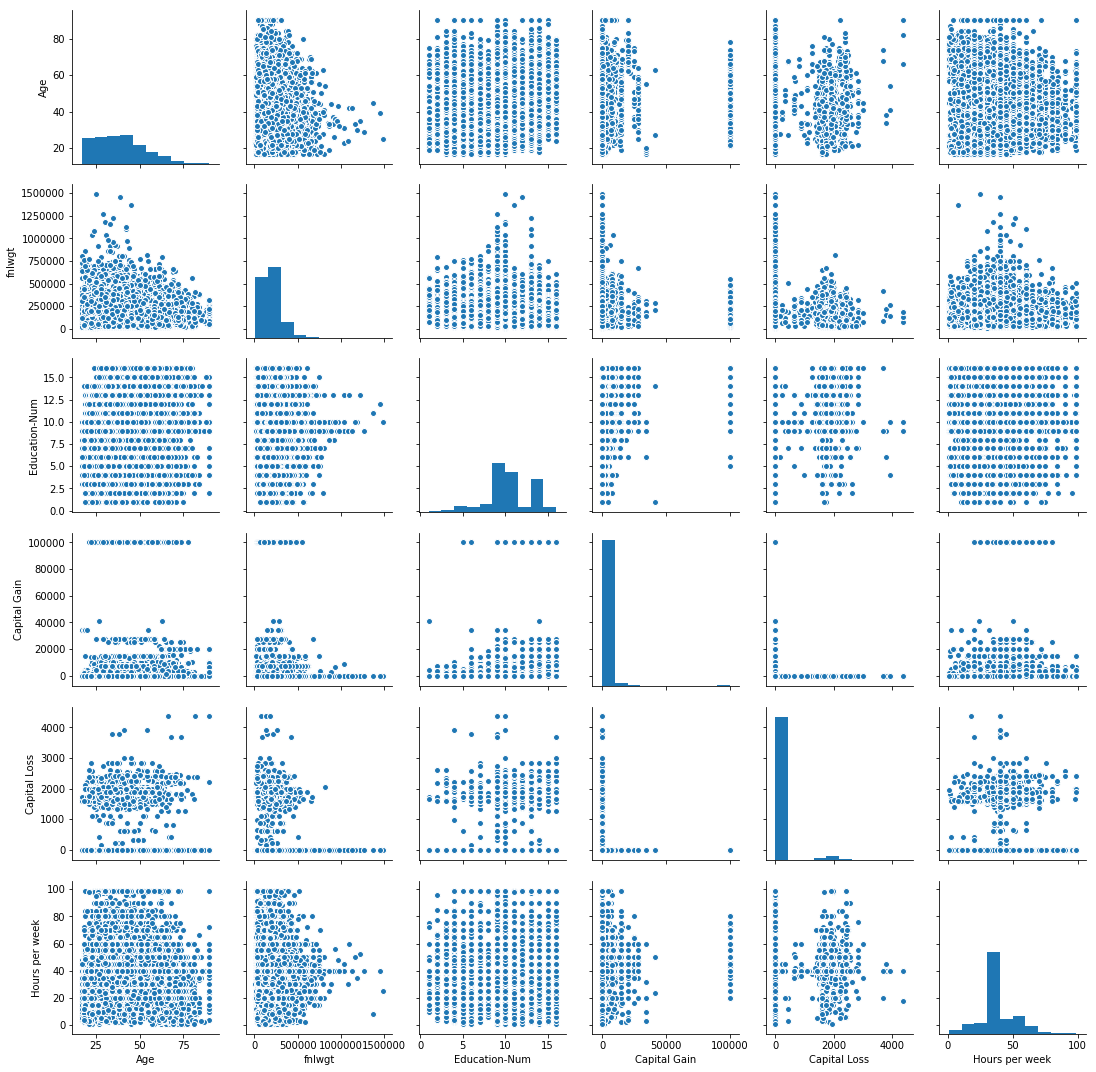

In [4]:
import seaborn as sns
sns.pairplot(data = df)

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
import math

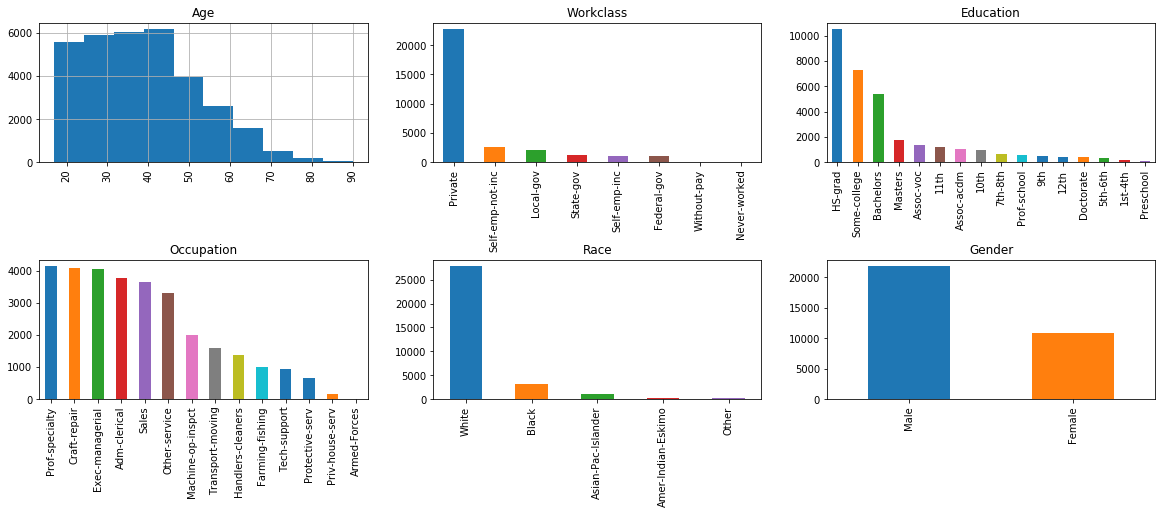

In [6]:
#prepare the data for the model
#explore the data graphically
fig = plt.figure(figsize = (20,20))
cols = 3
rows = math.ceil(float(df.shape[1] / cols))

for i, column in enumerate(['Age', 'Workclass', 'Education', 'Occupation', 'Race', 'Gender']):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind = 'bar', axes = ax)
    else:
        df[column].hist(axes = ax)
        plt.xticks(rotation = 'vertical')
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)
plt.show()
    

In [7]:
#now we use LabelEncoder to transform text to numbers and verify results
import sklearn.preprocessing as preprocessing

le = preprocessing.LabelEncoder()
df['Occupation'] = le.fit_transform(df['Occupation'].astype(str))
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
#we do the same with our response column, that is the one we shall predict on later
df['Target'] = le.fit_transform(df['Target'].astype(str))
df.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,3,Wife,White,Female,15024,0,40,United-States,1


In [9]:
#as one more verification, we check that the whole column contains only 0 and 1 numbers
df.Target.unique()

array([0, 1], dtype=int64)

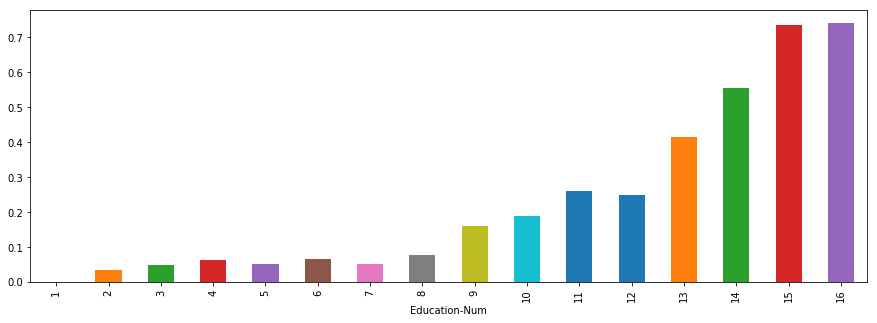

In [10]:
#Now out of curiosity, we check if years of education correlate with our target column, earning over 50K or not...
df.groupby('Education-Num').Target.mean().plot(kind = 'bar', figsize = (15,5))

## On a preliminary note, we can see that number of years of education strongly correlates with earning more than US$ 50k 

# Now we proceed to apply a model to the data, in order to predict future wages for any individual whose data we get

In [11]:
from sklearn.model_selection import train_test_split

#we take only the important features 
X = df[['Education-Num','Occupation']]
y = df['Target']

#now we split the data into 80% as a training set and 20% as testing set, in order to assess our accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
from sklearn.svm import SVC

#now we instanstiate the classifier with default parameters
clf = SVC()

#Now we fit the data. Here is where the SVM will learn
clf.fit(X_train, y_train)

#now we predict the result and print the accuracy
score = clf.score(X_test, y_test)

score

0.7871948410870566

## Now our challenge is to find the correlation between features, in order to identify the most important ones and tune the algorithm based on those only

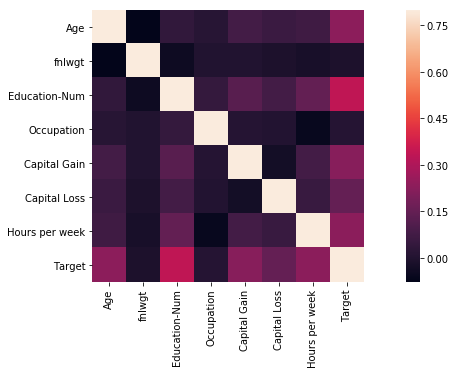

In [13]:
#we build a correlation matrix
import seaborn as sns

corrmat = df.corr()
f, ax = plt.subplots(figsize=(15,5))
sns.heatmap(corrmat, vmax = .8, square = True);
plt.show()

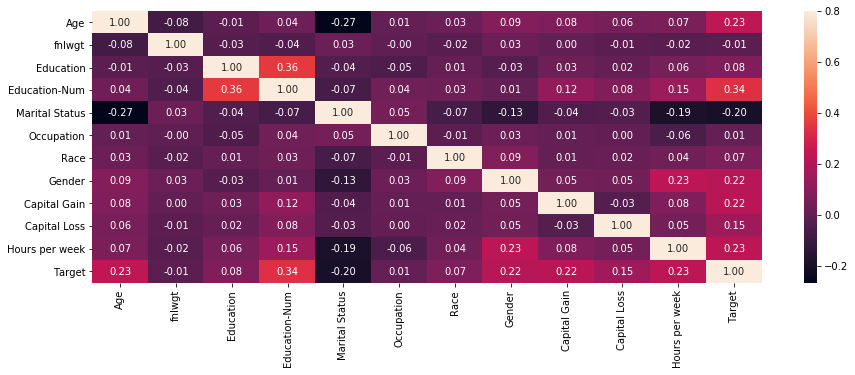

In [14]:
#Since there are columns missing in the corr above, we must change the type of the missing columns, so they'll show up in our graph
df['Race'] = le.fit_transform(df['Race'].astype(str))
df['Gender'] = le.fit_transform(df['Gender'].astype(str))
df['Marital Status'] = le.fit_transform(df['Marital Status'].astype(str))
df['Education'] = le.fit_transform(df['Education'].astype(str))

#and now we recreate the graph once more, but this time we also add annotations
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15,5))
sns.heatmap(corrmat, vmax = .8, square = False, annot = True, fmt = '.2f');
plt.show()

In [15]:
#Now we repeat the model fitting, but this time (since we changed the type to a number) we add the "Age" feature

In [ ]:
#we take only the important features 
X = df[['Education-Num','Occupation','Age', 'Gender']]
y = df['Target']

#now we split the data into 80% as a training set and 20% as testing set, in order to assess our accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#now we instanstiate the classifier with default parameters
clf = SVC()

#Now we fit the data. Here is where the SVM will learn
clf.fit(X_train, y_train)

#now we predict the result and print the accuracy
score = clf.score(X_test, y_test)

score

In [ ]:
#Now we try SVC with a kernel and default values, and see if this improves our model's accuracy
clf = SVC(kernel= 'rbf', C = 1.0)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

In [ ]:
#Now we try SVC with a kernel and DIFFERENT PARAMETER values, and see if this improves our model's accuracy
clf = SVC(kernel= 'rbf', C = 10.0)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

In [ ]:
#Now we try A LINEAR KERNEL INSTEAD,  with default parameters, and see if this improves our model's accuracy
clf = SVC(kernel= 'linear', C = 1.0)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

## Based on our predictive models, and given a few data points, we can predict with more than 80% certainty whether a person will earn more or less than US$ 50K

In [ ]:
#Let's now see our predictive model in action. 
#we pass the model the latest data we have obtained from two new individuals, in the form of a list of arrays

example_data = np.array([[12,3,23,2],[17,1,32,1]]) #these numbers correspond to 'Education-Num','Occupation','Age', 'Gender' for two individuals

#IMPORTANT: we must reshape the arrays appropriately as input for the model
#For just one set of individuals inputs we would use...
#([12,3,23,2]) and then reshape to (1, -1)
#but to pass several inputs we can do it with len()

example_data = example_data.reshape(len(example_measures),-1)


#Now we train the model with SVC with a kernel and default values, which is the model that has given us highest accuracy
clf = SVC(kernel= 'rbf', C = 1.0)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)



#Finally, we make the prediction for the new individuals with the input given
prediction = clf.predict(example_data)
print('The prediction for these individuals is', prediction, "Prediction's accuracy score is", score)

# Conclusion: according to their data and our model, we can predict with +80% accuracy that both of these individuals currently earn less than US$ 50k